### Poojitha Venkatram

### Assignment- 5

### Part- 1 GAN

### https://github.com/poojithavenkatram/Deep-Learning

100%|██████████| 26421880/26421880 [00:01<00:00, 18660479.53it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 340594.56it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6097909.75it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18023603.50it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

First batch
torch.Size([100, 1, 28, 28])
tensor([7, 3, 9, 4, 5, 2, 9, 6, 3, 4, 8, 6, 8, 4, 5, 8, 1, 3, 5, 4, 8, 5, 9, 4,
        6, 6, 8, 4, 2, 8, 4, 8, 0, 1, 1, 6, 4, 0, 8, 9, 8, 9, 8, 1, 7, 5, 9, 2,
        0, 3, 5, 4, 3, 8, 2, 2, 4, 5, 2, 4, 5, 0, 4, 9, 6, 0, 2, 8, 2, 0, 9, 6,
        4, 7, 5, 6, 9, 6, 1, 8, 6, 6, 3, 6, 3, 7, 9, 5, 7, 1, 0, 3, 0, 3, 9, 3,
        9, 4, 8, 5])


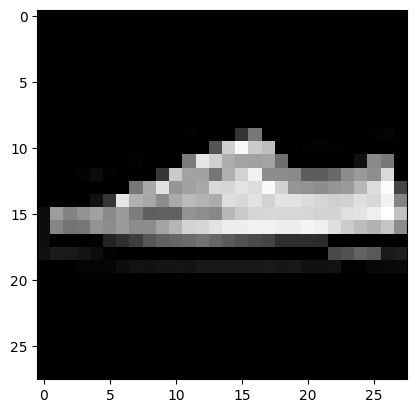

In [2]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# Defining the transformations, normalizing the images to have values between -1 and 1
transform = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])

# Loading the Fashion MNIST dataset
fashion_mnist = FashionMNIST(root='./data',
                             train=True,
                             download=True,
                             transform=transform)

# Creating the DataLoader to load images in batches
batch_size = 100
data_loader = DataLoader(fashion_mnist, batch_size=batch_size, shuffle=True)

# Iterating through the DataLoader to get a batch of images
for img_batch, label_batch in data_loader:
    print('First batch')
    print(img_batch.shape)  # Shape of the image batch
    plt.imshow(img_batch[0][0], cmap='gray')  # Displaying the first image in the batch
    print(label_batch)  # Printing the labels of the batch
    break

## Discriminator Network

In [57]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            # First linear layer
            nn.Linear(1024, 512),  # Adjusting input size to match the loaded weights
            nn.LeakyReLU(0.2),
            # Second linear layer
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            # Third linear layer
            nn.Linear(256, 1),
            nn.Sigmoid()  # Sigmoid to output probabilities
        )

    def forward(self, x):
        return self.model(x)

# Instantiation of the Discriminator
discriminator = Discriminator()
print(discriminator)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## Generator Network

In [49]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, input_dim):
        super(Generator, self).__init__()
        self.model = nn.ModuleDict({
            'fc1': nn.Linear(input_dim, 256),
            'act1': nn.LeakyReLU(0.2),
            'bn1': nn.BatchNorm1d(256),
            'fc2': nn.Linear(256, 512),
            'act2': nn.LeakyReLU(0.2),
            'bn2': nn.BatchNorm1d(512),
            'fc3': nn.Linear(512, 1024),
            'act3': nn.LeakyReLU(0.2),
            'bn3': nn.BatchNorm1d(1024),
            'fc4': nn.Linear(1024, 784),
            'act4': nn.Tanh()
        })

    def forward(self, x):
        x = self.model['fc1'](x)
        x = self.model['act1'](x)
        x = self.model['bn1'](x)
        x = self.model['fc2'](x)
        x = self.model['act2'](x)
        x = self.model['bn2'](x)
        x = self.model['fc3'](x)
        x = self.model['act3'](x)
        x = self.model['bn3'](x)
        x = self.model['fc4'](x)
        x = self.model['act4'](x)
        return x

# Instantiation of the Generator
input_dim = 100  # Size of the input noise vector
G = Generator(input_dim=input_dim)
print(G)

Generator(
  (model): ModuleDict(
    (fc1): Linear(in_features=100, out_features=256, bias=True)
    (act1): LeakyReLU(negative_slope=0.2)
    (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc2): Linear(in_features=256, out_features=512, bias=True)
    (act2): LeakyReLU(negative_slope=0.2)
    (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc3): Linear(in_features=512, out_features=1024, bias=True)
    (act3): LeakyReLU(negative_slope=0.2)
    (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc4): Linear(in_features=1024, out_features=784, bias=True)
    (act4): Tanh()
  )
)


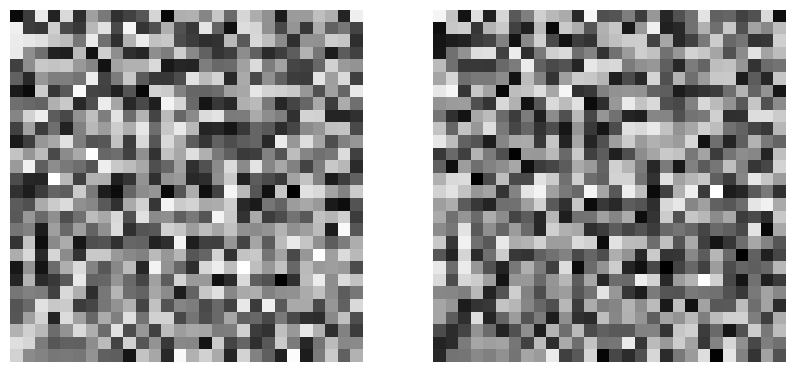

In [5]:
import torch
import matplotlib.pyplot as plt

latent_size=100

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

# Generating random noise as input to the generator
y = G(torch.randn(2, latent_size))
# Reshaping the generator output and apply denormalization
gen_imgs = denorm(y.reshape((-1, 28, 28)).detach())

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(gen_imgs[i], cmap='gray')
    ax.axis('off')  # Hiding axes ticks
plt.show()

## Discriminator Training

In [6]:
def train_discriminator(D, G, images, batch_size, latent_size, d_optimizer, criterion, device):
    # Creating the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Moving the images to the configured device
    images = images.to(device)

    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combining losses
    d_loss = d_loss_real + d_loss_fake
    # Reset the gradients
    d_optimizer.zero_grad()
    # Computing the gradients
    d_loss.backward()
    # Adjusting the parameters using backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

## Generator Training

In [7]:
def train_generator(G, D, batch_size, latent_size, g_optimizer, criterion, device):
    # Generating fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Resetting gradients
    g_optimizer.zero_grad()
    # Backpropagation
    g_loss.backward()
    # Updating generator's parameters
    g_optimizer.step()

    return g_loss, fake_images

## Training the Model

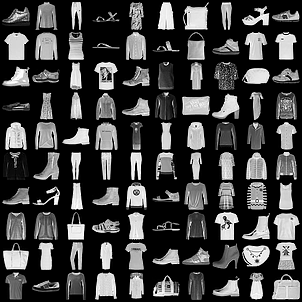

In [8]:
import os
from torchvision.utils import save_image

# Directory for saving samples
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Function to denormalize image
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

# Saving some real images from the dataset
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break

# Displaying the saved image
from IPython.display import Image
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


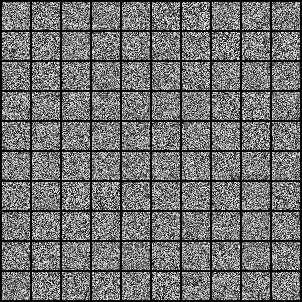

In [9]:
# Defining a helper function to save a batch of generated images to disk at the end of every epoch
import torch
from torchvision.utils import save_image
from IPython.display import Image
import os

# Ensuring the sample_dir is created
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Defining the function to save fake images
def save_fake_images(G, sample_vectors, index, sample_dir='samples', denorm=lambda x: x):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = f'fake_images-{index:04d}.png'
    print(f'Saving {fake_fname}')
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

# Generating a set of sample vectors (latent space vectors) for generating fake images
batch_size = 100
latent_size = 100
sample_vectors = torch.randn(batch_size, latent_size)  # Assuming CPU for simplicity

# Calling the function to save fake images before training starts
save_fake_images(G, sample_vectors, 0, sample_dir, denorm)

# Assuming 'sample_dir' is the directory where the images are saved
image_path = os.path.join(sample_dir, 'fake_images-0000.png')

# Displaying the image
Image(image_path)

### Training the model

### In each epoch, train the discriminator first, and then the generator.

In [10]:
import torch
import time
from torchvision.utils import save_image
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
latent_size = 100
batch_size = 100
num_epochs = 200

# Models
G = Generator(latent_size).to(device)
D = Discriminator().to(device)

# Optimizers
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)

# Loss function
criterion = nn.BCELoss()

start_time = time.time()

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)  # Adjusting for device

        # Training the discriminator
        d_loss, real_score, fake_score = train_discriminator(D, G, images, batch_size, latent_size, d_optimizer, criterion, device)

        # Generating noise for generator training
        z = torch.randn(batch_size, latent_size).to(device)

        # Training the generator
        g_loss, fake_images = train_generator(G, D, batch_size, latent_size, g_optimizer, criterion, device)

        if (i+1) % 200 == 0 or (i+1) == len(data_loader):
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

    # Saving images at the end of each epoch
    save_fake_images(G=G, sample_vectors=sample_vectors.to(device), index=epoch + 1, sample_dir='samples', denorm=lambda x: (x + 1) / 2)

    # Saving the model checkpoints at specified epochs
    if epoch + 1 in [10, 50, 100, 150, 200]:
        torch.save(G.state_dict(), os.path.join(sample_dir, f'G_epoch_{epoch+1}.ckpt'))
        torch.save(D.state_dict(), os.path.join(sample_dir, f'D_epoch_{epoch+1}.ckpt'))
        print(f'Checkpoint saved for epoch {epoch+1}')

end_time = time.time()
print(f'Training complete in {end_time - start_time:.2f}s')

Epoch [1/200], Step [200/600], d_loss: 0.7974, g_loss: 3.2227, D(x): 0.82, D(G(z)): 0.26
Epoch [1/200], Step [400/600], d_loss: 0.0920, g_loss: 5.0213, D(x): 0.96, D(G(z)): 0.04
Epoch [1/200], Step [600/600], d_loss: 0.1132, g_loss: 5.8559, D(x): 0.97, D(G(z)): 0.05
Saving fake_images-0001.png
Epoch [2/200], Step [200/600], d_loss: 0.0245, g_loss: 7.1812, D(x): 0.99, D(G(z)): 0.02
Epoch [2/200], Step [400/600], d_loss: 0.0277, g_loss: 7.2366, D(x): 0.99, D(G(z)): 0.01
Epoch [2/200], Step [600/600], d_loss: 0.0203, g_loss: 8.3126, D(x): 1.00, D(G(z)): 0.02
Saving fake_images-0002.png
Epoch [3/200], Step [200/600], d_loss: 0.0296, g_loss: 9.4077, D(x): 0.98, D(G(z)): 0.00
Epoch [3/200], Step [400/600], d_loss: 0.0105, g_loss: 8.4952, D(x): 0.99, D(G(z)): 0.00
Epoch [3/200], Step [600/600], d_loss: 0.0056, g_loss: 9.6629, D(x): 1.00, D(G(z)): 0.00
Saving fake_images-0003.png
Epoch [4/200], Step [200/600], d_loss: 0.0123, g_loss: 11.7113, D(x): 1.00, D(G(z)): 0.01
Epoch [4/200], Step [400/

In [33]:
# Saving the model weights in the folder to be used later
torch.save(G.state_dict(), 'generator_weights.pth')
torch.save(D.state_dict(), 'discriminator_weights.pth')

In [12]:
# Saving all the model checkpoints
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

In [51]:
# Load the state dictionary
state_dict = torch.load('generator_weights.pth', map_location=device)

# Print the keys of the state dictionary
print(state_dict.keys())

odict_keys(['model.0.weight', 'model.0.bias', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.3.weight', 'model.3.bias', 'model.5.weight', 'model.5.bias', 'model.5.running_mean', 'model.5.running_var', 'model.5.num_batches_tracked', 'model.6.weight', 'model.6.bias', 'model.8.weight', 'model.8.bias', 'model.8.running_mean', 'model.8.running_var', 'model.8.num_batches_tracked', 'model.9.weight', 'model.9.bias'])


In [60]:
import torch
import torch.nn as nn

# Define the Generator class
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the Generator
G = Generator()

# Load the weights for the Generator
generator_weights = torch.load('generator_weights.pth', map_location=torch.device('cpu'))
G.load_state_dict(generator_weights)

# Print message indicating successful loading of weights for the Generator
print("Generator weights loaded successfully.")

Generator weights loaded successfully.


In [61]:
import torch
import torch.nn as nn

# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 784)  # Flattening the image
        return self.model(x)

# Instantiate the Discriminator
D = Discriminator()

# Load the weights for the Discriminator
discriminator_weights = torch.load('discriminator_weights.pth', map_location=torch.device('cpu'))
D.load_state_dict(discriminator_weights)

# Print message indicating successful loading of weights for the Discriminator
print("Discriminator weights loaded successfully.")

Discriminator weights loaded successfully.


###### Here's how the generated images look, after the 10th, 50th, 100th and 200th epochs of training.

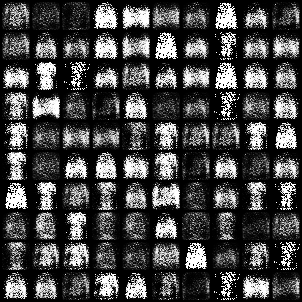

In [13]:
Image('./samples/fake_images-0010.png')

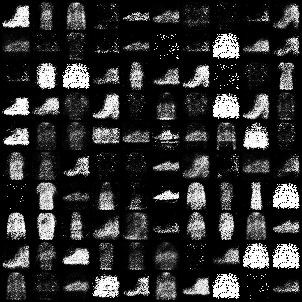

In [14]:
Image('./samples/fake_images-0050.png')

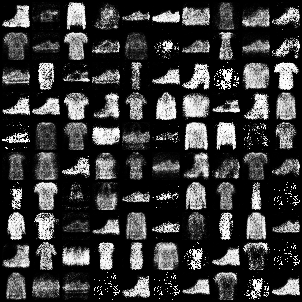

In [15]:
Image('./samples/fake_images-0100.png')

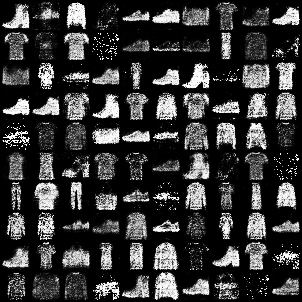

In [16]:
Image('./samples/fake_images-0150.png')

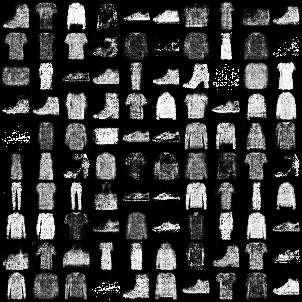

In [17]:
Image('./samples/fake_images-0200.png')

###### Visualizing training process by combining the sample images generated after each epoch into a video using OpenCV.

In [18]:
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

#### Retraining the GAN Model with the saved weights

In [64]:
# Initializing the lists to store losses and scores for plotting
g_losses = []
d_losses = []
real_scores = []
fake_scores = []

# Re-training the GAN model for 50 epochs
for epoch in range(50):
    for batch_idx, (real_images, _) in enumerate(data_loader):
        real_images = real_images.to(device)

        # Train Discriminator
        d_optimizer.zero_grad()
        real_outputs = D(real_images)
        d_real_loss = criterion(real_outputs, torch.ones_like(real_outputs))

        z = torch.randn(batch_size, input_dim).to(device)
        fake_images = G(z)
        fake_outputs = D(fake_images.detach())
        d_fake_loss = criterion(fake_outputs, torch.zeros_like(fake_outputs))

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        fake_outputs = D(fake_images)
        g_loss = criterion(fake_outputs, torch.ones_like(fake_outputs))
        g_loss.backward()
        g_optimizer.step()

        # Saving the losses and scores for plotting
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())
        real_scores.append(torch.mean(real_outputs).item())
        fake_scores.append(torch.mean(fake_outputs).item())

        # Printing losses and scores
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{49}], Batch Step [{batch_idx}/{len(data_loader)}], "
                  f"Discriminator Loss: {d_loss.item():.4f}, Generator Loss: {g_loss.item():.4f}, "
                  f"Real Score: {torch.mean(real_outputs).item():.4f}, Fake Score: {torch.mean(fake_outputs).item():.4f}")

Epoch [0/49], Batch Step [0/600], Discriminator Loss: 1.2121, Generator Loss: 1.1412, Real Score: 0.5840, Fake Score: 0.3815
Epoch [0/49], Batch Step [100/600], Discriminator Loss: 1.2867, Generator Loss: 1.3018, Real Score: 0.6229, Fake Score: 0.4083
Epoch [0/49], Batch Step [200/600], Discriminator Loss: 1.0845, Generator Loss: 1.1344, Real Score: 0.6712, Fake Score: 0.3909
Epoch [0/49], Batch Step [300/600], Discriminator Loss: 1.2238, Generator Loss: 1.1079, Real Score: 0.6064, Fake Score: 0.3951
Epoch [0/49], Batch Step [400/600], Discriminator Loss: 1.3489, Generator Loss: 1.0355, Real Score: 0.5942, Fake Score: 0.4398
Epoch [0/49], Batch Step [500/600], Discriminator Loss: 1.2648, Generator Loss: 1.0921, Real Score: 0.5979, Fake Score: 0.3966
Epoch [1/49], Batch Step [0/600], Discriminator Loss: 1.1206, Generator Loss: 1.3189, Real Score: 0.6012, Fake Score: 0.3369
Epoch [1/49], Batch Step [100/600], Discriminator Loss: 1.1154, Generator Loss: 1.2629, Real Score: 0.6318, Fake Sc

### Visualizing the losses

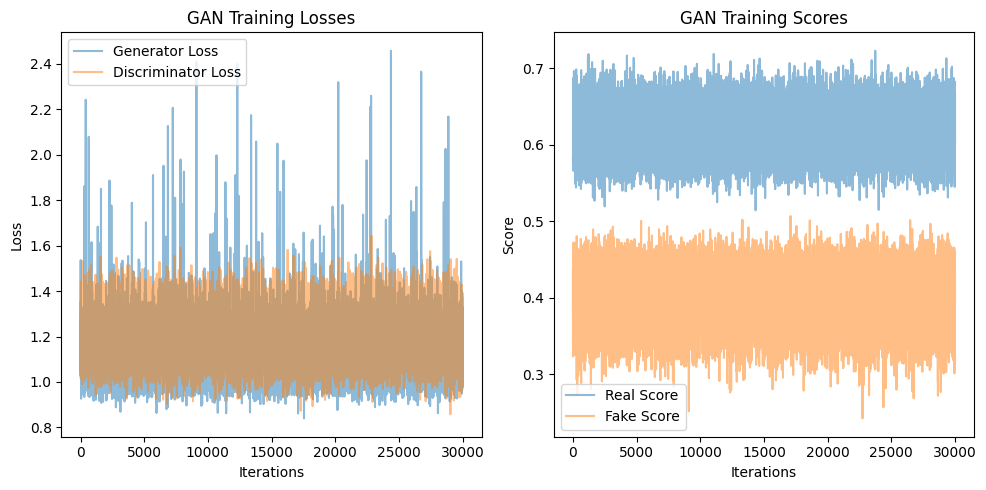

In [65]:
# Plotting the losses and scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(g_losses, label='Generator Loss', alpha=0.5)
plt.plot(d_losses, label='Discriminator Loss', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(real_scores, label='Real Score', alpha=0.5)
plt.plot(fake_scores, label='Fake Score', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('GAN Training Scores')
plt.legend()
plt.tight_layout()
plt.show()

#### The performance of the re-trained GAN model seems suboptimal, as indicated by fluctuating discriminator and generator losses throughout training. The discriminator appears to struggle to differentiate between real and fake images, as evidenced by the close proximity of real and fake scores. Additionally, the generator's ability to produce realistic images seems limited, given the high generator loss and the lack of improvement in the quality of generated images over the training epochs. Overall, the model's performance suggests that it may require further optimization or architectural adjustments to achieve better results.

In [74]:
# Save the model weights for both Generator and Discriminator
torch.save(G.state_dict(), 'generator_weights.pth')
torch.save(D.state_dict(), 'discriminator_weights.pth')
print("Saved the model weights without using checkpoints.")

Saved the model weights without using checkpoints.


In [75]:
# Instantiate the Generator and Discriminator models
G = Generator()
D = Discriminator()

# Load the saved weights for the Generator and Discriminator
G.load_state_dict(torch.load('generator_weights.pth', map_location=device))
D.load_state_dict(torch.load('discriminator_weights.pth', map_location=device))
print("Loaded the model weights without using checkpoints.")

Loaded the model weights without using checkpoints.
